In [1]:
##############################################################################################################
# DESCRIPTION: 
# RESULTS:     
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################

import os

class HyperParams:
    pass

IMG_PATH = "C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/"

IMG_PATH_VALID = IMG_PATH + "validation/"
IMG_PATH_TEST = IMG_PATH + "test/"
IMG_PATH_TRAIN = IMG_PATH

hyperparams = HyperParams()
hyperparams.IMG_WIDTH = 64
hyperparams.IMG_HEIGHT = 64
hyperparams.EPOCHS = 1000
hyperparams.BATCH_SIZE = 32

hyperparams.LOSS = 'mean_absolute_error'

IMG_WIDTH = hyperparams.IMG_WIDTH
IMG_HEIGHT = hyperparams.IMG_HEIGHT

IMG_CASE = str(IMG_WIDTH) +  "/0100_1000"
MODEL_NAME = "0100_1000-64-convsim-i"

DEST_TESTS = os.path.abspath(os.path.join('../../../out_tests/', MODEL_NAME))

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0898
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.3248

from tensorflow.keras.optimizers import Nadam
hyperparams.OPTIMIZER = Nadam(learning_rate=0.0001)

In [3]:
##################
# IMPORTS
##################

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils
import TrainModelC as train
import ReportsK as reports
import ConvSimG as model_factory

In [4]:
##################
# MODEL DEFINITION
##################
model = model_factory.buildModel(hyperparams)
model.summary()
model.optimizer.get_config()
model.optimizer.get_config()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   544         input_1[0][0]                    
__________________________________________________________________________________________________
activation_4 (Activation)       (None, 32, 32, 32)   0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 16, 16, 16)   8208        activation_4[0][0]               
______________________________________________________________________________________________

{'name': 'Nadam',
 'learning_rate': 0.0001,
 'decay': 0.004,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07}

In [5]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid = dsutils.readDataset( IMG_PATH_TRAIN, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
val_noisy_files, val_nitid_files, val_noisy, val_nitid = dsutils.readDataset( IMG_PATH_VALID, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid = dsutils.reshapeDataset( train_noisy, train_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
val_noisy, val_nitid = dsutils.reshapeDataset( val_noisy, val_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/
Noisy files:8886
Nitid files:8886
Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/validation/
Noisy files:2209
Nitid files:2209


In [6]:
##################
# TRAIN MODEL
##################
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)


hist = train.fit( model, hyperparams, train_noisy, train_nitid, val_noisy, val_nitid, patience = 200 )

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6

Epoch 1/1000
278/278 [==============================] - 8s 16ms/step - loss: 0.0696 - val_loss: 0.0300
Epoch 2/1000
278/278 [==============================] - 4s 15ms/step - loss: 0.0319 - val_loss: 0.0258
Epoch 3/1000
278/278 [==============================] - 4s 15ms/step - loss: 0.0294 - val_loss: 0.0249
Epoch 4/1000
278/278 [==============================] - 4s 15ms/step - loss: 0.0282 - val_loss: 0.0231
Epoch 5/1000
278/278 [==============================] - 4s 15ms/step - loss: 0.0276 - val_loss: 0.0227
Epoch 6/1000
278/278 [==============================] - 4s 15ms/step - loss: 0.0271 - val_loss: 0.0225
Epoch 7/1000
278/278 [==============================] - 4s 15ms/step - loss: 0.0269 - val_loss: 0.0221
Epoch 8/1000
278/278 [==============================] - 4s 15ms/step - loss: 0.0266 - val_loss: 0.0221
Epoch 9/1000
278

278/278 [==============================] - 4s 15ms/step - loss: 0.0229 - val_loss: 0.0227
Epoch 79/1000
278/278 [==============================] - 4s 15ms/step - loss: 0.0229 - val_loss: 0.0228
Epoch 80/1000
278/278 [==============================] - 4s 15ms/step - loss: 0.0229 - val_loss: 0.0229
Epoch 81/1000
278/278 [==============================] - 4s 14ms/step - loss: 0.0229 - val_loss: 0.0222
Epoch 82/1000
278/278 [==============================] - 4s 14ms/step - loss: 0.0228 - val_loss: 0.0229
Epoch 83/1000
278/278 [==============================] - 4s 14ms/step - loss: 0.0228 - val_loss: 0.0232
Epoch 84/1000
278/278 [==============================] - 4s 15ms/step - loss: 0.0228 - val_loss: 0.0230
Epoch 85/1000
278/278 [==============================] - 4s 15ms/step - loss: 0.0228 - val_loss: 0.0218
Epoch 86/1000
278/278 [==============================] - 4s 14ms/step - loss: 0.0228 - val_loss: 0.0228
Epoch 87/1000
278/278 [==============================] - 4s 15ms/step - loss: 

278/278 [==============================] - 4s 15ms/step - loss: 0.0218 - val_loss: 0.0227
Epoch 157/1000
278/278 [==============================] - 4s 15ms/step - loss: 0.0217 - val_loss: 0.0239
Epoch 158/1000
278/278 [==============================] - 4s 14ms/step - loss: 0.0216 - val_loss: 0.0242
Epoch 159/1000
278/278 [==============================] - 4s 14ms/step - loss: 0.0217 - val_loss: 0.0226
Epoch 160/1000
278/278 [==============================] - 4s 15ms/step - loss: 0.0217 - val_loss: 0.0221
Epoch 161/1000
278/278 [==============================] - 4s 15ms/step - loss: 0.0217 - val_loss: 0.0232
Epoch 162/1000
278/278 [==============================] - 4s 14ms/step - loss: 0.0217 - val_loss: 0.0238
Epoch 163/1000
278/278 [==============================] - 4s 15ms/step - loss: 0.0217 - val_loss: 0.0226
Epoch 164/1000
278/278 [==============================] - 4s 15ms/step - loss: 0.0217 - val_loss: 0.0234
Epoch 165/1000
278/278 [==============================] - 4s 15ms/step

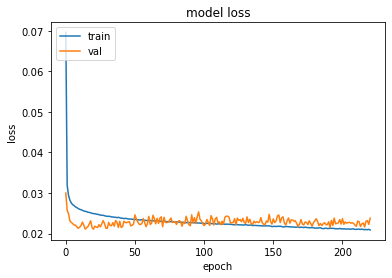

In [7]:
##################
# REPORTS
##################
reports.plotHistory( hist )

In [8]:
model.save(os.path.abspath(os.path.join('../../../saves/', MODEL_NAME)), model)

INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-convsim-i\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [9]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = 0.01
predictions_metrics, predictions_headers \
    = reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD, \
                                    save_pred = True, save_path = DEST_TESTS, \
                                    noisy_files = val_noisy_files, nitid_files = val_nitid_files, \
                                    max_nitid= radiance_limits.nitid_max  )

Black image found
Black image found
Images count =2209
Best RMSENZ  =2054 (0.93)
Best MAENZ   =2059 (0.93)
Best Accuracy=1976 (0.89)
RMSE-NZ  Pred=0.0282  Noisy=0.0942
MAE-NZ   Pred=0.0242  Noisy=0.0903
PSNR     Pred=18.7 dB Noisy=9.3 dB
Accuracy Pred=0.34    Noisy=0.09
SSM      Pred=0.94    Noisy=0.68
HOG MSE  Pred=0.10    Noisy=0.12


Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test/
Noisy files:15
Nitid files:15
Index:0
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_00_02_13_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_00_02_13_nitid_idx134.tif


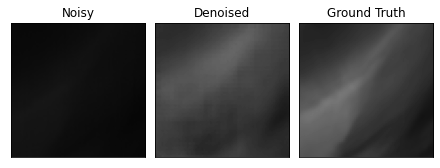

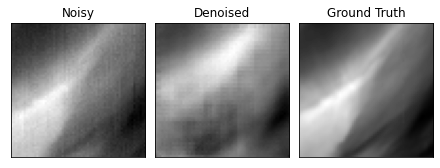

RMSE-NZ  Pred=0.0706  Noisy=0.2105 BEST
MAE-NZ   Pred=0.0557  Noisy=0.1954 BEST
PSNR     Pred=16.4 dB Noisy=6.9 dB BEST
Accuracy Pred=0.06    Noisy=0.00 BEST
SSM      Pred=0.88    Noisy=0.39
HOG MSE  Pred=0.08    Noisy=0.13
******************************************************
Index:1
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_00_02_14_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_00_02_14_nitid_idx134.tif


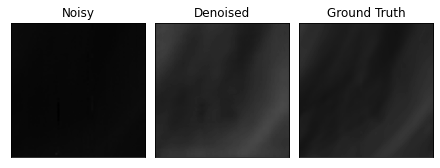

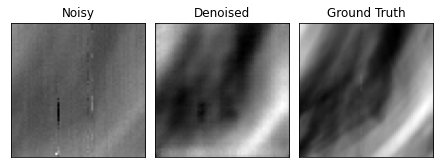

RMSE-NZ  Pred=0.0481  Noisy=0.0994 BEST
MAE-NZ   Pred=0.0456  Noisy=0.0953 BEST
PSNR     Pred=13.3 dB Noisy=7.0 dB BEST
Accuracy Pred=0.00    Noisy=0.00 BEST
SSM      Pred=0.93    Noisy=0.35
HOG MSE  Pred=0.04    Noisy=0.16
******************************************************
Index:2
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_00_0_noisy_idx014.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_00_0_nitid_idx017.tif


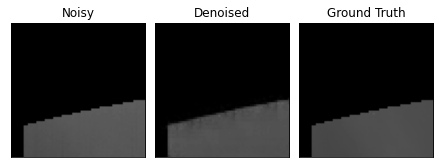

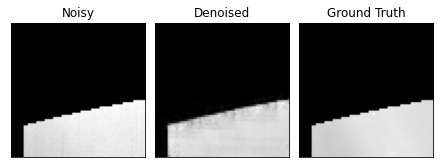

RMSE-NZ  Pred=0.0185  Noisy=0.0388 BEST
MAE-NZ   Pred=0.0091  Noisy=0.0376 BEST
PSNR     Pred=25.4 dB Noisy=19.0 dB BEST
Accuracy Pred=0.71    Noisy=0.00 BEST
SSM      Pred=0.96    Noisy=0.95
HOG MSE  Pred=0.18    Noisy=0.07
******************************************************
Index:3
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0317_03_01_4_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0317_03_01_4_nitid_idx017.tif


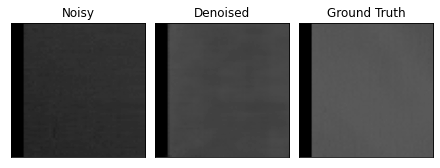

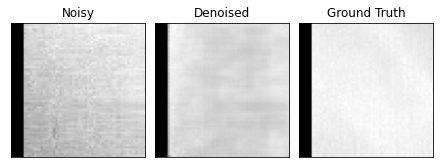

RMSE-NZ  Pred=0.0708  Noisy=0.1632 BEST
MAE-NZ   Pred=0.0670  Noisy=0.1622 BEST
PSNR     Pred=14.1 dB Noisy=6.9 dB BEST
Accuracy Pred=0.06    Noisy=0.00 BEST
SSM      Pred=0.93    Noisy=0.87
HOG MSE  Pred=0.00    Noisy=0.01
******************************************************
Index:4
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_03_02_4_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_03_02_4_nitid_idx134.tif


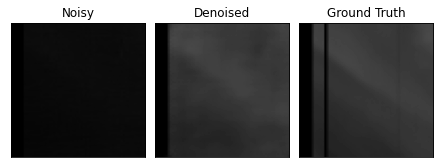

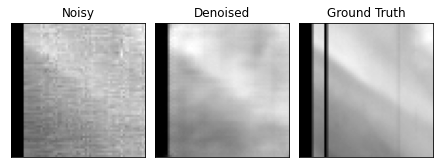

RMSE-NZ  Pred=0.0302  Noisy=0.1704 BEST
MAE-NZ   Pred=0.0133  Noisy=0.1661 BEST
PSNR     Pred=19.6 dB Noisy=4.6 dB BEST
Accuracy Pred=0.61    Noisy=0.00 BEST
SSM      Pred=0.89    Noisy=0.33
HOG MSE  Pred=0.04    Noisy=0.07
******************************************************
Index:5
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_03_02_5_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_03_02_5_nitid_idx134.tif


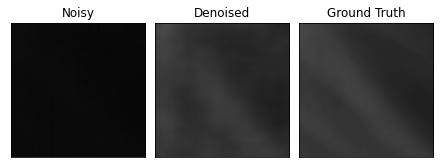

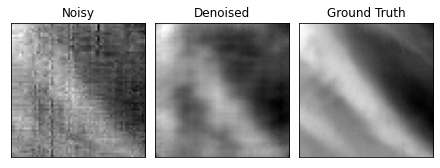

RMSE-NZ  Pred=0.0166  Noisy=0.1649 BEST
MAE-NZ   Pred=0.0129  Noisy=0.1619 BEST
PSNR     Pred=24.5 dB Noisy=4.6 dB BEST
Accuracy Pred=0.49    Noisy=0.00 BEST
SSM      Pred=0.96    Noisy=0.36
HOG MSE  Pred=0.11    Noisy=0.35
******************************************************
Index:6
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0332_00_01_12_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0332_00_01_12_nitid_idx017.tif


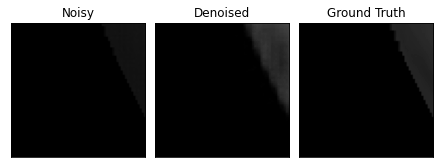

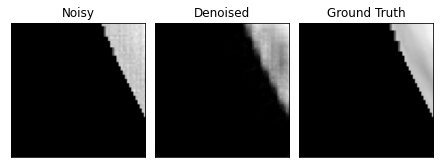

RMSE-NZ  Pred=0.0194  Noisy=0.0366 BEST
MAE-NZ   Pred=0.0072  Noisy=0.0184 BEST
PSNR     Pred=19.5 dB Noisy=14.0 dB BEST
Accuracy Pred=0.84    Noisy=0.74 BEST
SSM      Pred=0.96    Noisy=0.90
HOG MSE  Pred=0.32    Noisy=0.02
******************************************************
Index:7
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0332_00_02_5_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0332_00_02_5_nitid_idx134.tif


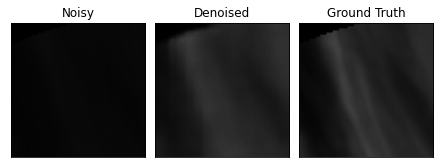

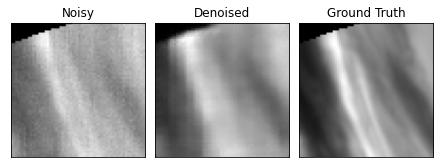

RMSE-NZ  Pred=0.0189  Noisy=0.1089 BEST
MAE-NZ   Pred=0.0148  Noisy=0.0979 BEST
PSNR     Pred=22.5 dB Noisy=7.3 dB BEST
Accuracy Pred=0.41    Noisy=0.01 BEST
SSM      Pred=0.91    Noisy=0.38
HOG MSE  Pred=0.05    Noisy=0.13
******************************************************
Index:8
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0343_03_01_8_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0343_03_01_8_nitid_idx017.tif


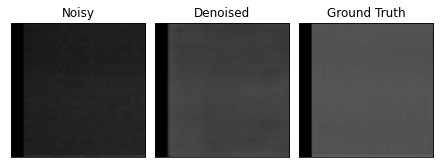

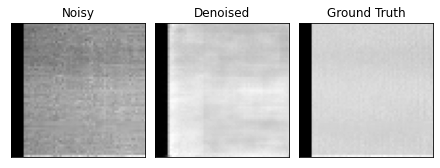

RMSE-NZ  Pred=0.0721  Noisy=0.1952 BEST
MAE-NZ   Pred=0.0684  Noisy=0.1947 BEST
PSNR     Pred=14.7 dB Noisy=6.0 dB BEST
Accuracy Pred=0.06    Noisy=0.00 BEST
SSM      Pred=0.93    Noisy=0.75
HOG MSE  Pred=0.01    Noisy=0.02
******************************************************
Index:9
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_11_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_11_nitid_idx134.tif


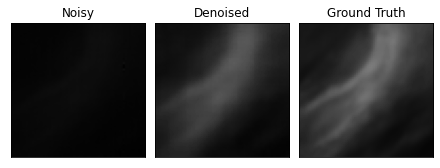

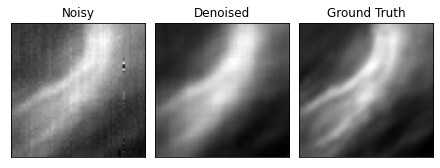

RMSE-NZ  Pred=0.0556  Noisy=0.1931 BEST
MAE-NZ   Pred=0.0491  Noisy=0.1660 BEST
PSNR     Pred=18.8 dB Noisy=8.0 dB BEST
Accuracy Pred=0.01    Noisy=0.00 BEST
SSM      Pred=0.87    Noisy=0.37
HOG MSE  Pred=0.03    Noisy=0.09
******************************************************
Index:10
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_12_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_12_nitid_idx134.tif


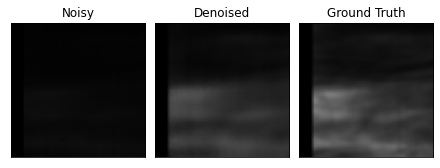

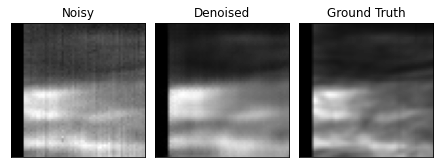

RMSE-NZ  Pred=0.0556  Noisy=0.1742 BEST
MAE-NZ   Pred=0.0422  Noisy=0.1438 BEST
PSNR     Pred=19.0 dB Noisy=9.1 dB BEST
Accuracy Pred=0.11    Noisy=0.00 BEST
SSM      Pred=0.88    Noisy=0.47
HOG MSE  Pred=0.01    Noisy=0.05
******************************************************
Index:11
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_13_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_13_nitid_idx134.tif


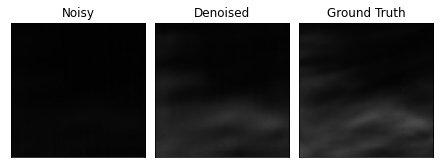

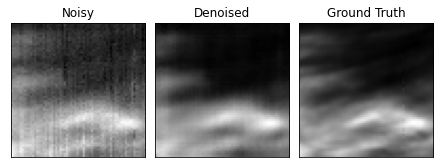

RMSE-NZ  Pred=0.0285  Noisy=0.0979 BEST
MAE-NZ   Pred=0.0228  Noisy=0.0772 BEST
PSNR     Pred=20.1 dB Noisy=9.4 dB BEST
Accuracy Pred=0.27    Noisy=0.04 BEST
SSM      Pred=0.93    Noisy=0.58
HOG MSE  Pred=0.03    Noisy=0.12
******************************************************
Index:12
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_03_11_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_03_11_nitid_idx146.tif


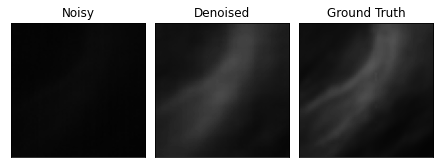

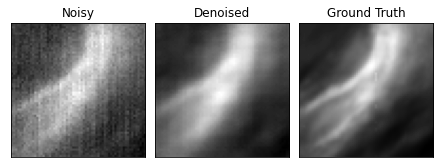

RMSE-NZ  Pred=0.0194  Noisy=0.1221 BEST
MAE-NZ   Pred=0.0153  Noisy=0.1019 BEST
PSNR     Pred=24.8 dB Noisy=8.8 dB BEST
Accuracy Pred=0.41    Noisy=0.02 BEST
SSM      Pred=0.94    Noisy=0.39
HOG MSE  Pred=0.03    Noisy=0.14
******************************************************
Index:13
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_03_8_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_03_8_nitid_idx146.tif


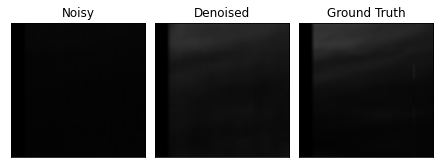

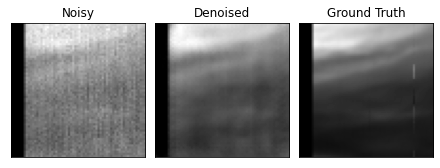

RMSE-NZ  Pred=0.0179  Noisy=0.0710 BEST
MAE-NZ   Pred=0.0149  Noisy=0.0512 BEST
PSNR     Pred=21.9 dB Noisy=10.0 dB BEST
Accuracy Pred=0.34    Noisy=0.21 BEST
SSM      Pred=0.90    Noisy=0.49
HOG MSE  Pred=0.08    Noisy=0.10
******************************************************
Index:14
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_0_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_0_nitid_idx134.tif


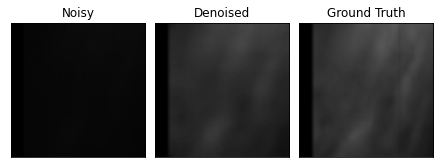

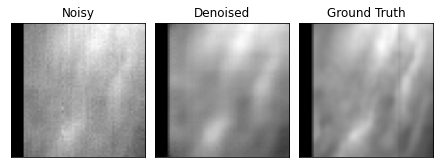

RMSE-NZ  Pred=0.0405  Noisy=0.1835 BEST
MAE-NZ   Pred=0.0374  Noisy=0.1780 BEST
PSNR     Pred=18.6 dB Noisy=5.5 dB BEST
Accuracy Pred=0.08    Noisy=0.00 BEST
SSM      Pred=0.93    Noisy=0.33
HOG MSE  Pred=0.02    Noisy=0.03
******************************************************


In [10]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid = dsutils.readDataset( IMG_PATH_TEST, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
test_noisy, test_nitid = dsutils.reshapeDataset( test_noisy, test_nitid,  hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
test_indexes = np.arange(0,test_noisy.shape[0])

reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, test_indexes, ACCURACY_THRESHOLD )